Датасет берите с каггла:
https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information


- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид 
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

## 1 задача


### 1.1. Скачать данные

In [1]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости


- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


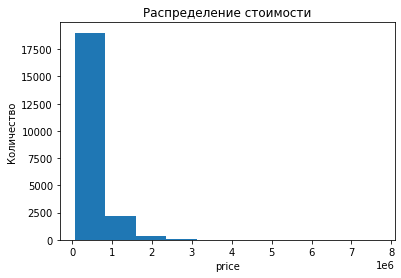

In [2]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.title('Распределение стоимости')
plt.xlabel('price')
plt.ylabel('Количество');

### 1.3 Изучите распределение квадратуры жилой


- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


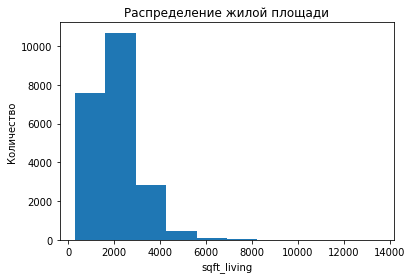

In [4]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('sqft_living')
plt.ylabel('Количество');

### 1.4 Изучите распределение года постройки


- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


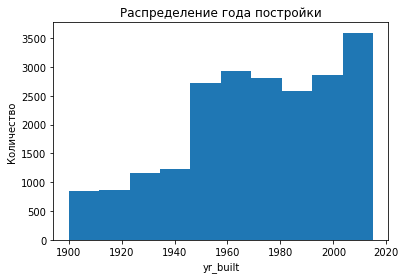

In [7]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('yr_built')
plt.ylabel('Количество');

## 2 задача


### 2.1 Изучите распределение домов от наличия вида на набережную

- Постройте график
- Сделайте выводы

In [10]:
data = df['waterfront'].value_counts()

names = data.index
values = data.values

data

0    21450
1      163
Name: waterfront, dtype: int64

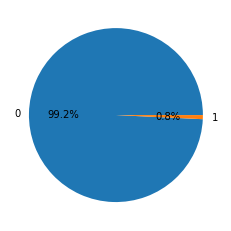

In [11]:
plt.pie(values, autopct='%.1f%%', labels=names);

### 2.2 Изучите распределение этажей домов

- Постройте график
- Сделайте выводы

In [13]:
data = df['floors'].value_counts()

names = data.index
values = data.values

data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

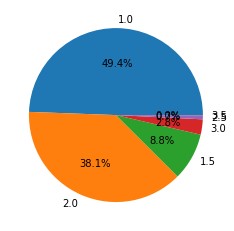

In [14]:
plt.pie(values, autopct='%.1f%%', labels=names);

### 2.3 Изучите распределение состояния домов

- Постройте график
- Сделайте выводы

In [16]:
data = df['condition'].value_counts()

names = data.index
values = data.values

data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

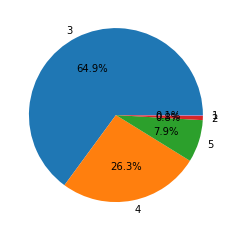

In [17]:
plt.pie(values, autopct='%.1f%%', labels=names);

## 3 задача


Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости,  с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


In [19]:
import numpy as np
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


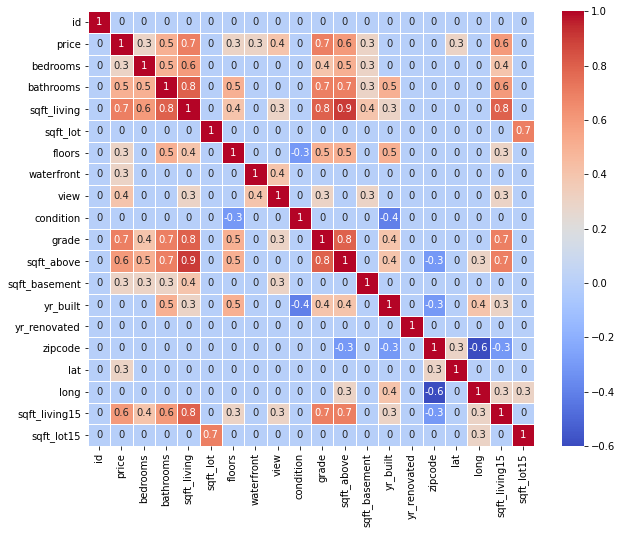

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

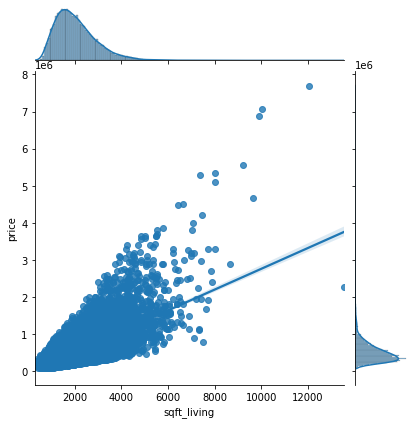

In [24]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

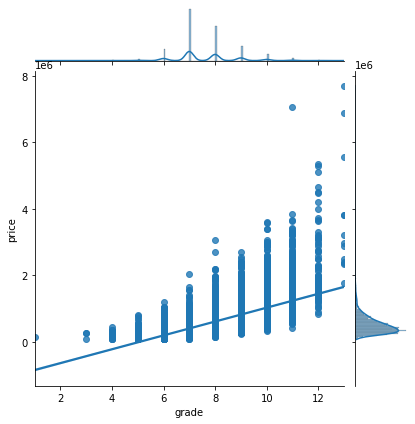

In [26]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

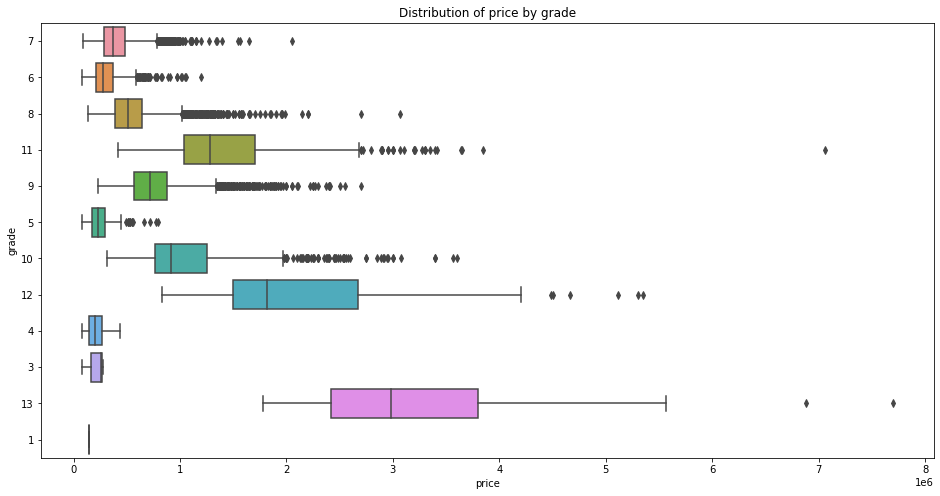

In [31]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

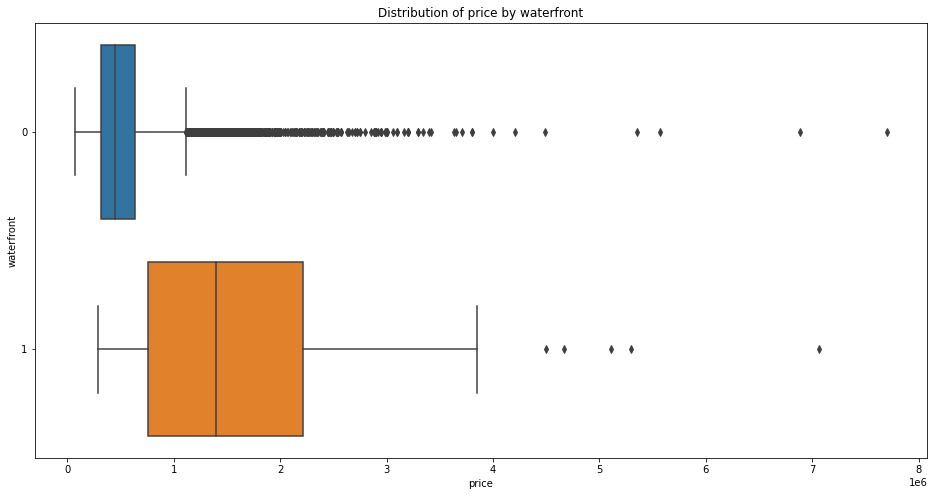

In [30]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('Distribution of price by waterfront');

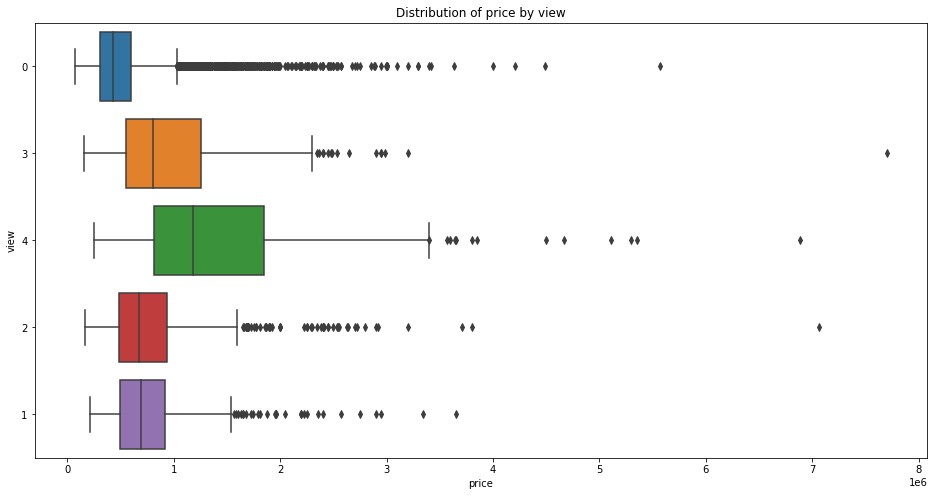

In [32]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');